# Projeto 2 - Ciência dos Dados 2020.2

**Participantes**

- Enrico Lopez Borges de Carvalho

- Luana Mitsudo Coelho

- Luiza Valezim Augusto Pinto

- Rodrigo Carvalho Monteiro de Barros

## Introdução

Esse Projeto tem como objetivo tentar prever a nota que diversos jogos receberiam no site *Metacritic*, um site de avaliação de jogos. Para isso, foram levadas em consideração suas características principais (como seu preço, seu gênero, entre outros), informações obtidas em um datasheet do site *Kaggle* em forma de Excel. <br>
Foram selecionadas somente àquelas colunas de características que interessavam para o resultado da previsão.  <br>
O método utilizado foi **INSERIR O NOME DO MÉTODO QUE IREMOS UTILIZAR**, o qual (...)

## Desenvolvimento

**Carregando as bibliotecas**

In [69]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

#biblioteca de decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from IPython.display import display

**Carregando a base de dados dos jogos**

In [70]:
filename = 'Games.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()} :(')

Encontrei o arquivo Games.xlsx, tudo certo para prosseguir com o projeto!


 # Lendo os arquivos

In [71]:
#cria o dataframe a partir da tabela excel
games =  pd.read_excel(filename)

# Formatando Datasheet para trabalhar.

Algumas colunas do Datasheet obtido não estavam em um formato favorável para a manupilação em pandas, portanto, foram necessarias algumas alterações. Colunas com informações não importantes para a previsão desejada foram descartadas. Algumas colunas precisaram ser manipuladas quanto a valores numericos ou categorias, mais simples de manipular com o Pandas e com o Sklearn. 

In [72]:
#retira colunas não desejadas do dataframe
jogos = games.drop('Column1',axis=1).drop('id',axis=1).drop('RawgID',axis=1).drop('SteamURL',axis=1).drop('Graphics',axis=1) \
            .drop('Storage',axis=1).drop('Memory',axis=1).drop('RatingsBreakdown',axis=1).drop('ReleaseDate',axis=1)\
            .drop('Soundtrack',axis=1).drop('Franchise',axis=1).drop('DiscountedCost',axis=1).drop('Controller',axis=1)\
            .drop('ESRB',axis=1).drop('Publisher',axis=1).drop('Description',axis=1).drop('Tags',axis=1).copy()

#retira linhas com dados faltando do dataframe.
jogos = jogos.dropna()
jogos = jogos.reset_index(drop=True) # correção necessaria para reorganizar as

jogos

,Name,Metacritic,Genres,Indie,Presence,Platform,OriginalCost,Players,Languages,Achievements
0,Counter-Strike: Global Offensive,830.0,"Action, Free to Play",0.0,10095880.0,"PC, Xbox 360, PlayStation 3",Free to Play,"multiplayer, pvp, coop, online coop","English, Czech, Danish, Dutch, Finnish, French...",1790.0
1,Destiny 2,820.0,"Action, Adventure, Free to Play",0.0,10074250.0,"PlayStation 5, Web, Xbox Series X, PC, Xbox On...",Free To Play,"multiplayer, coop, online coop","English, French, Italian, German, Japanese, Ko...",610.0
2,The Elder Scrolls Online,710.0,"Massively Multiplayer, RPG",0.0,10007810.0,PC,$19.99,"singleplayer, multiplayer, coop","English, French, German, Russian",0.0
3,Sea of Thieves,680.0,"Action, Adventure",0.0,7774560.0,"PC, Xbox One",$39.99,"multiplayer, pvp, coop, online coop","English, French, Italian, German, Russian",3080.0
4,Tom Clancy's Rainbow Six Siege,750.0,Action,0.0,10014240.0,"PlayStation 4, PC, Xbox One",$19.99,"singleplayer, multiplayer, coop, online coop","English, French, Italian, German, Czech, Dutch...",820.0
...,...,...,...,...,...,...,...,...,...,...
2330,Metroid: Zero Mission,890.0,"Action, Indie, Early Access",10.0,5485350.0,"Game Boy Advance, Wii U",$1.99,singleplayer,English,0.0
2331,Crookz - The Big Heist,740.0,"Adventure, Casual, Indie",10.0,29260.0,"macOS, iOS, Linux, PC",$3.99,singleplayer,English,300.0
2332,NARUTO TO BORUTO: SHINOBI STRIKER,620.0,Action,0.0,1651550.0,"PC, Xbox One, PlayStation 4",$2.99,singleplayer,English,480.0
2333,The Fall Part 2: Unbound,720.0,"Action, Casual, Indie, RPG, Simulation, Strategy",10.0,114980.0,"PC, macOS, Linux, PlayStation 4, Xbox One, Nin...",$0.99,singleplayer,"English, Russian",750.0


### Mudanças na coluna "Languages"
A coluna apresentava, para cada jogo, uma lista de linguas em que o mesmo era disponibilizado. O código abaixo lê cada linha dessa coluna e substitui a lista em texto pelo numero de linguas disponiveis.

In [73]:
#transforma a coluna "Laguages" de uma lista de linguas para uma quantidade de linguas disponiveis
for L in range(len(jogos.Languages)):
    lista_linguas = str(jogos.Languages[L]).split(",")
    jogos.Languages[L] = len(lista_linguas)


C:\Users\rodri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Mudanças na coluna "OriginalCost"

In [74]:
#transforma os textos da coluna "OriginalCost" em valores escritos
jogos.OriginalCost = jogos.OriginalCost.str.extract('(\d+)').astype(float).fillna(0)

        #jogos.OriginalCost[P] = 0
#if jogos.OriginalCost[P].contains("$") :
#jogos.OriginalCost.dtype
#jogos.OriginalCost.unique()
#jogos.OriginalCost[2]
jogos

,Name,Metacritic,Genres,Indie,Presence,Platform,OriginalCost,Players,Languages,Achievements
0,Counter-Strike: Global Offensive,830.0,"Action, Free to Play",0.0,10095880.0,"PC, Xbox 360, PlayStation 3",0.0,"multiplayer, pvp, coop, online coop",23,1790.0
1,Destiny 2,820.0,"Action, Adventure, Free to Play",0.0,10074250.0,"PlayStation 5, Web, Xbox Series X, PC, Xbox On...",0.0,"multiplayer, coop, online coop",8,610.0
2,The Elder Scrolls Online,710.0,"Massively Multiplayer, RPG",0.0,10007810.0,PC,19.0,"singleplayer, multiplayer, coop",4,0.0
3,Sea of Thieves,680.0,"Action, Adventure",0.0,7774560.0,"PC, Xbox One",39.0,"multiplayer, pvp, coop, online coop",5,3080.0
4,Tom Clancy's Rainbow Six Siege,750.0,Action,0.0,10014240.0,"PlayStation 4, PC, Xbox One",19.0,"singleplayer, multiplayer, coop, online coop",12,820.0
...,...,...,...,...,...,...,...,...,...,...
2330,Metroid: Zero Mission,890.0,"Action, Indie, Early Access",10.0,5485350.0,"Game Boy Advance, Wii U",1.0,singleplayer,1,0.0
2331,Crookz - The Big Heist,740.0,"Adventure, Casual, Indie",10.0,29260.0,"macOS, iOS, Linux, PC",3.0,singleplayer,1,300.0
2332,NARUTO TO BORUTO: SHINOBI STRIKER,620.0,Action,0.0,1651550.0,"PC, Xbox One, PlayStation 4",2.0,singleplayer,1,480.0
2333,The Fall Part 2: Unbound,720.0,"Action, Casual, Indie, RPG, Simulation, Strategy",10.0,114980.0,"PC, macOS, Linux, PlayStation 4, Xbox One, Nin...",0.0,singleplayer,2,750.0


### Dividindo as colunas "Players", "Genders" e "Platform" e criando novas colunas
As colunas "Players", "Genders" e "Platform" apresentavam uma lista de modos de jogo em que o mesmo era disponibilizado, os generos nos quais o jogo se encaixa e as plataformas em que ele está disponivel, respectivamente. 
O código abaixo lê cada uma dessas colunas, e cria uma coluna, com valores boleanos, para cada opção das categorias de cada coluna.

In [75]:
#Genres
textog=",".join(jogos.Genres)
textog=textog.split(",")
lista_gen=[]
for el in textog:
    if el not in lista_gen and el[0]!=" ":
        lista_gen.append(el)
print(lista_gen)

for elem in lista_gen:
    filtrod=jogos.Genres.str.contains(f"{elem}")
    jogos.loc[filtrod,f"{elem}"]=filtrod

['Action', 'Massively Multiplayer', 'Strategy', 'Racing', 'RPG', 'Simulation', 'Casual', 'Adventure', 'Indie', 'Free to Play', 'Sports']


In [76]:
#Platform
textplat=",".join(jogos.Platform)
textplat=textplat.split(",")
lista_plat=[]
for el in textplat:
    if el not in lista_plat and el[0]!=" ":
        lista_plat.append(el)
print(lista_plat)

for ele in lista_plat:
    filtrodd=jogos.Platform.str.contains(f"{ele}")
    jogos.loc[filtrodd,f"{ele}"]=filtrodd

['PC', 'PlayStation 5', 'PlayStation 4', 'Linux', 'Xbox One', 'Xbox Series X', 'macOS', 'Android', 'iOS', 'Nintendo Switch', 'PlayStation 3', 'Xbox 360', 'Nintendo 3DS', 'GameCube', 'SNES', 'PS Vita', 'Nintendo DS', 'PlayStation 2', 'Xbox', 'Dreamcast', 'Wii', 'PlayStation', 'Web', 'Wii U', 'Game Boy Advance']


In [77]:
#Players
textplayers=",".join(jogos.Players)
textplayers=textplayers.split(",")
lista_players=[]
for el in textplayers:
    if el not in lista_players and el[0]!=" ":
        lista_players.append(el)
print(lista_players)

for ele in lista_players:
    filtroddd=jogos.Players.str.contains(f"{ele}")
    jogos.loc[filtroddd,f"{ele}"]=filtroddd

['multiplayer', 'singleplayer', 'coop', 'pvp', 'online coop']


In [78]:
del jogos["Players"]
del jogos["Genres"]
del jogos["Platform"]

jogos

,Name,Metacritic,Indie,Presence,OriginalCost,Languages,Achievements,Action,Massively Multiplayer,Strategy,...,Wii,PlayStation,Web,Wii U,Game Boy Advance,multiplayer,singleplayer,coop,pvp,online coop
0,Counter-Strike: Global Offensive,830.0,0,10095880.0,0.0,23,1790.0,True,NaN,NaN,...,NaN,True,NaN,NaN,NaN,True,NaN,True,True,True
1,Destiny 2,820.0,0,10074250.0,0.0,8,610.0,True,NaN,NaN,...,NaN,True,True,NaN,NaN,True,NaN,True,NaN,True
2,The Elder Scrolls Online,710.0,0,10007810.0,19.0,4,0.0,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN
3,Sea of Thieves,680.0,0,7774560.0,39.0,5,3080.0,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,True,True,True
4,Tom Clancy's Rainbow Six Siege,750.0,0,10014240.0,19.0,12,820.0,True,NaN,NaN,...,NaN,True,NaN,NaN,NaN,True,True,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Metroid: Zero Mission,890.0,True,5485350.0,1.0,1,0.0,True,NaN,NaN,...,True,NaN,NaN,True,True,NaN,True,NaN,NaN,NaN
2331,Crookz - The Big Heist,740.0,True,29260.0,3.0,1,300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
2332,NARUTO TO BORUTO: SHINOBI STRIKER,620.0,0,1651550.0,2.0,1,480.0,True,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN
2333,The Fall Part 2: Unbound,720.0,True,114980.0,0.0,2,750.0,True,NaN,True,...,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN


### Descrição das variaveis da tabela final:
 
 **Name:** Nome do jogo.
 
 **Metacritic:** Nota dada pelo site Metacritic até 1000 pontos, sendo, quanto maior, melhor.
 
 **Genres:** Gêneros em que o jogo pode ser classificado.
 
 **Indie:** Se o jogo se classifica como Indie ou não (0 significa que não e 10 significa que sim).
 
 **Presence:** Quantas vezes foi mencionado nas redes sociais (pode ser lido também como relevância).
 
 **Platform:** Plataformas disponíveis do jogo.
 
 **OriginalCost:** Preço (em dólares americanos) do jogo na data de lançamento.
 
 **Players:** Modos de jogo disponíveis para o jogo ser jogado.
 
 **Languages:** Quantidade de línguas disponíveis do jogo.
 
 **Achievements:** Quantidade de conquistas disponíveis para o jogador conseguir durante o jogo (pode demonstrar sua complexidade).

### Gráficos

**Quantidade por faixa de preço**

Text(0.5, 1.0, 'Quantidade de jogos por preço do jogo na data de lançamento ')

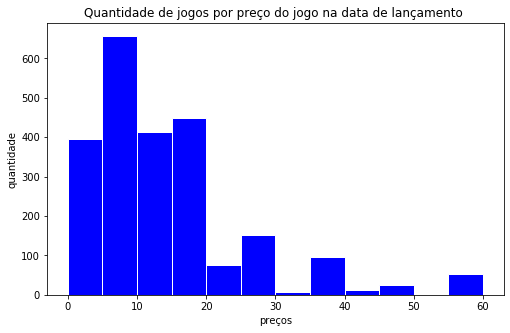

In [79]:
preco_inicial=jogos.OriginalCost

faixas = np.arange(0,65,5)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(preco_inicial, bins=faixas,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('preços')
plt.title('Quantidade de jogos por preço do jogo na data de lançamento ')

**Quantidade por nota do Metacritic**

Text(0.5, 1.0, 'Quantidade de jogos por nota do Metacritic')

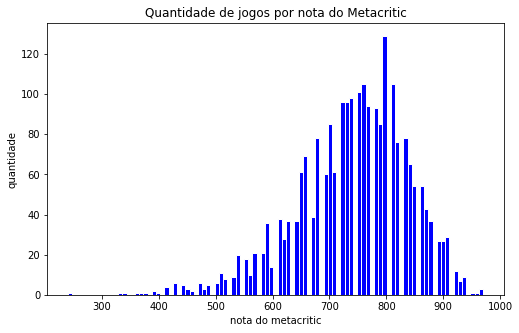

In [80]:
metacritic_inicial=jogos.Metacritic

faixas_metacritic = np.linspace(metacritic_inicial.min(),metacritic_inicial.max(),100)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(metacritic_inicial, bins=faixas_metacritic,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('nota do metacritic')
plt.title('Quantidade de jogos por nota do Metacritic')

**Nota do Metacritic por preço na data de lançamento, quantidade de achievements, quantidade de citações sobre o jogo na internet e**

Text(0, 0.5, 'nota do metacritic')

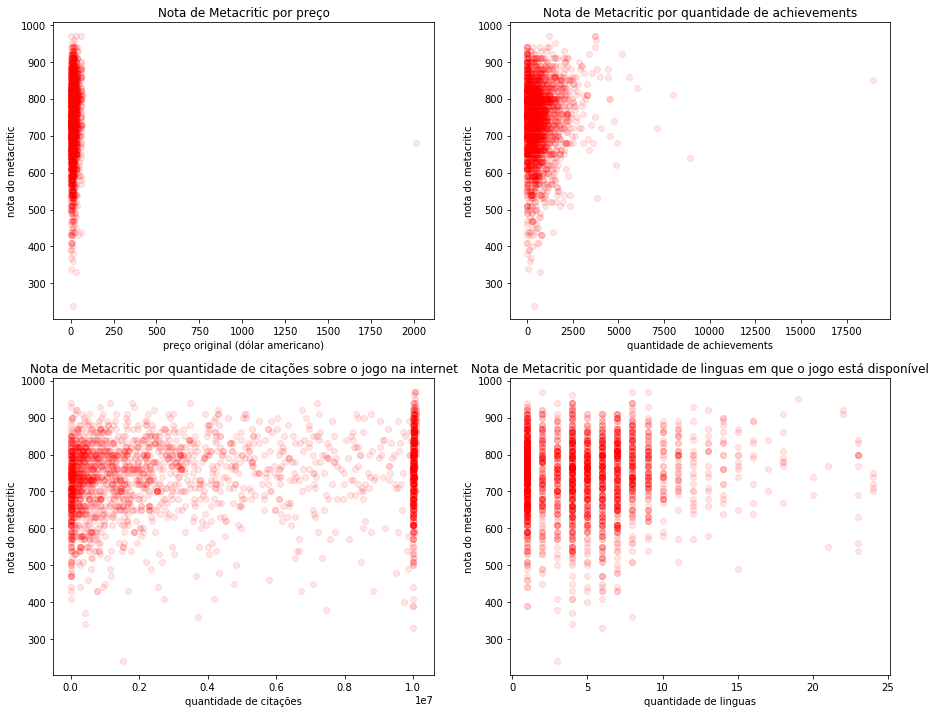

In [81]:
plt.figure(figsize=(15, 12))

plt.subplot(221)
plt.scatter(jogos.OriginalCost,jogos.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por preço')
plt.xlabel('preço original (dólar americano)')
plt.ylabel('nota do metacritic')

plt.subplot(222)
plt.scatter(jogos.Achievements,jogos.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por quantidade de achievements')
plt.xlabel('quantidade de achievements')
plt.ylabel('nota do metacritic')

plt.subplot(223)
plt.scatter(jogos.Presence,jogos.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por quantidade de citações sobre o jogo na internet')
plt.xlabel('quantidade de citações')
plt.ylabel('nota do metacritic')

plt.subplot(224)
plt.scatter(jogos.Languages,jogos.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por quantidade de linguas em que o jogo está disponível')
plt.xlabel('quantidade de linguas')
plt.ylabel('nota do metacritic')

In [82]:
jogos = jogos.replace(np.nan, False, regex=True)
jogos.head(5)

,Name,Metacritic,Indie,Presence,OriginalCost,Languages,Achievements,Action,Massively Multiplayer,Strategy,...,Wii,PlayStation,Web,Wii U,Game Boy Advance,multiplayer,singleplayer,coop,pvp,online coop
0,Counter-Strike: Global Offensive,830.0,0,10095880.0,0.0,23,1790.0,True,False,False,...,False,True,False,False,False,True,False,True,True,True
1,Destiny 2,820.0,0,10074250.0,0.0,8,610.0,True,False,False,...,False,True,True,False,False,True,False,True,False,True
2,The Elder Scrolls Online,710.0,0,10007810.0,19.0,4,0.0,False,True,False,...,False,False,False,False,False,True,True,True,False,False
3,Sea of Thieves,680.0,0,7774560.0,39.0,5,3080.0,True,False,False,...,False,False,False,False,False,True,False,True,True,True
4,Tom Clancy's Rainbow Six Siege,750.0,0,10014240.0,19.0,12,820.0,True,False,False,...,False,True,False,False,False,True,True,True,False,True


## Separando o dataframe em treinamento e teste

In [86]:
#separa o dataframe para aplicar a funcao
#faz uma copia do dataframe sem a variavel que queremos prever.
X = jogos.drop('Metacritic',axis=1).drop('Name',axis=1).copy()
#faz uma copia apenas da variavel que vamos prever
y = jogos.Metacritic.copy()

#separa cada um dos dois dataframes em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y) 

## Monstrinho

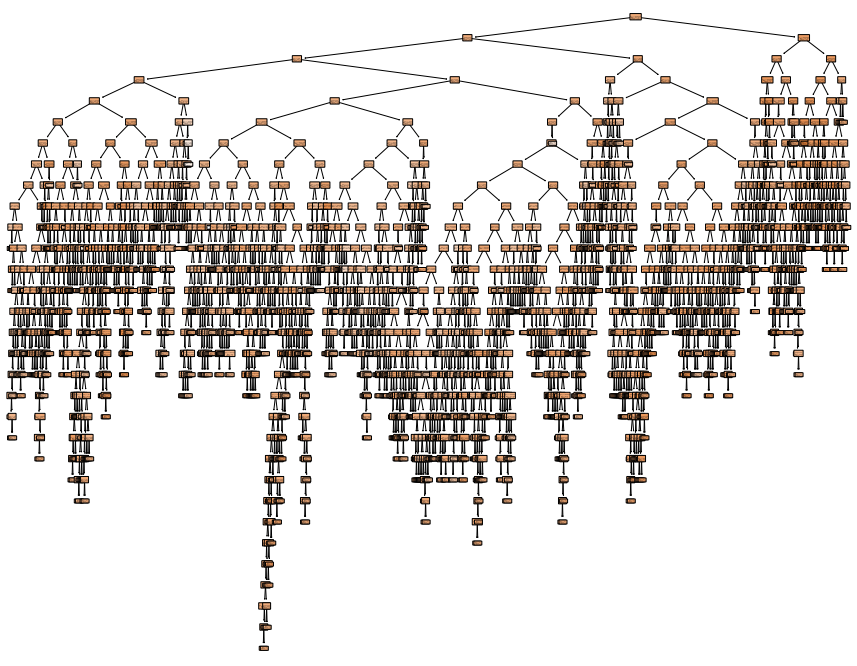

In [87]:
#cria a decision tree regresion a partir dos dados de treinamento
modelo = DecisionTreeRegressor()
modelo = modelo.fit(X_train, y_train)

plt.figure(figsize=(15, 12))
plot_tree(modelo, filled=True, rounded=True);

## Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

video maravilindo sobre montar decision tree em python: <br>
https://www.youtube.com/watch?v=q90UDEgYqeI&ab_channel=StatQuestwithJoshStarmer

código para a conversõo da coluna "OriginalCost"  <br>
https://stackoverflow.com/questions/48319617/pandas-remove-strings-from-a-float-number-in-a-column